# Titanic - Machine Learning from Disaster
### Beginner - score 0,76794
02-01-2021 Annelies Hofstede | https://github.com/annelieshofstede | https://www.kaggle.com/annelieshofstede

In [11]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/4800/1*Q59ONUgBl159KgMJvghShA.jpeg")


Titanic - RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.With much public attention in the aftermath the disaster has since been the material of many artistic works and a founding material of the disaster film genre. https://en.wikipedia.org/wiki/Titanic
More than 1500 of 2224 died, so 32,5% survived.

Route, Ports of Embarkation: Start in UK Southampton (S), Cherbourg France (C), Queenstown (now Cobh) Ireland (Q), New York United States. 

**The competition**: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Sources/references:
* Introduction video: https://youtu.be/8yZMXCaFshs
* Alexis tutorial: https://www.kaggle.com/alexisbcook/titanic-tutorial
* Titanic notebooks from others on: https://www.kaggle.com/search?q=titanic
* Minsuk Heo video (3) on youtube: https://youtu.be/3eTSVGY_fIE
* And, of course, the information provided in the two days of module 08 in the ITANN course. 

## Steps:
1. Import libraries
2. Load data
3. Explore data
4. Feature engineering
5. Create, train and tune model
6. Apply to test-data

## 1. Import libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.model_selection import train_test_split

#Classifier modules
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2. Load data

The data has been split into two groups:

* training set (train.csv) [#891]
* test set (test.csv) [#418]
* total passengers in set #1309   // total on ship #2224 -> 915 not in datasets 40% of total passengers

https://www.kaggle.com/c/titanic/overview



In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 3. Explore data

In [14]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variables
* PassengerId - ID
* Survival -	0 = No, 1 = Yes
* Pclass - Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex	- male / female	
* Age	- Age in years	
* Sibsp - # of siblings / spouses aboard the Titanic	
* Parch -	# of parents / children aboard the Titanic	
* Ricket - Ticket number	
* Fare - Passenger fare	
* Cabin - Cabin number	
* Embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
def null_table(train, test):
    print("Training Data Frame")
    print(pd.isnull(train).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(test).sum())
    
null_table(train, test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [19]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
null_table(train, test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [21]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

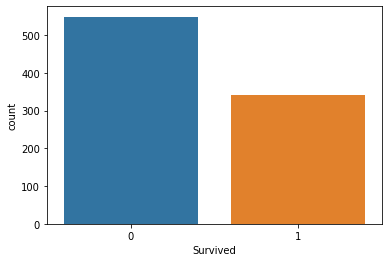

In [23]:
sns.countplot( x="Survived" ,data=train)

In [24]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### 3.1 PClass

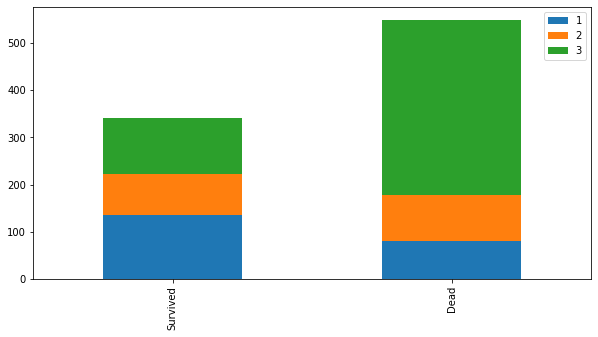

In [25]:
bar_chart('Pclass')

In [26]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,136
2,3,119
1,2,87


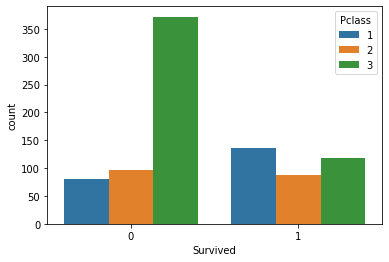

In [27]:
sns.countplot(x="Survived",hue="Pclass",data=train)

### 3.2 Name

In [28]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [29]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Lady          1
Ms            1
Sir           1
Countess      1
Jonkheer      1
Mme           1
Capt          1
Name: Title, dtype: int64

**Title**
- Mr - 0
- Miss - 1
- Mrs - 2
- Others - 3


In [31]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 1,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 2,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

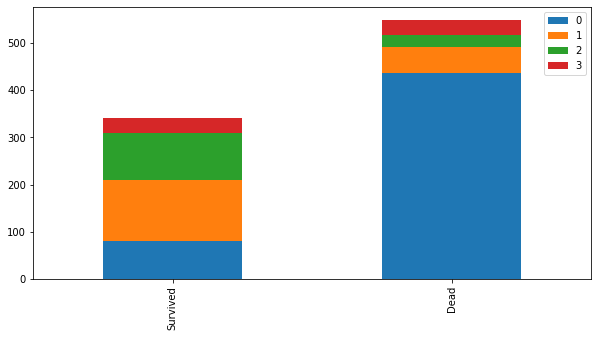

In [32]:
bar_chart('Title')

- [x] Drop name, add title to Features

### 3.3 Sex

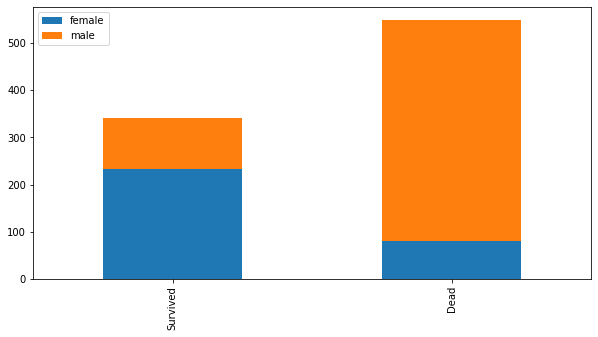

In [33]:
bar_chart('Sex')

### 3.4 Age

How to fill missing ages?

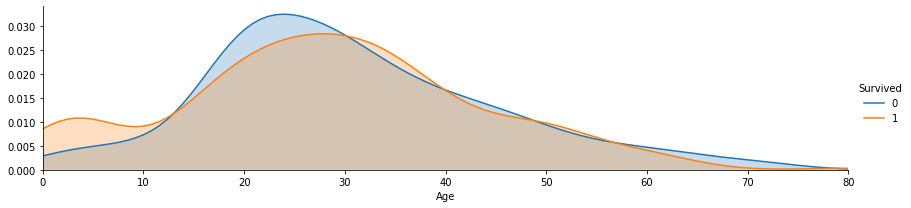

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [35]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [36]:
train['Age'].mean()

29.69911764705882

In [37]:
train['Age'].median()

28.0

In [38]:
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(test.Age.median())

In [39]:
for dataset in train_test_data:
      dataset.loc[ dataset['Age'] <= 16, 'Age_category'] = 0 
      dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 25), 'Age_category'] = 1
      dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 45), 'Age_category'] = 2
      dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age_category'] = 3
      dataset.loc[ dataset['Age'] > 60, 'Age_category'] = 7

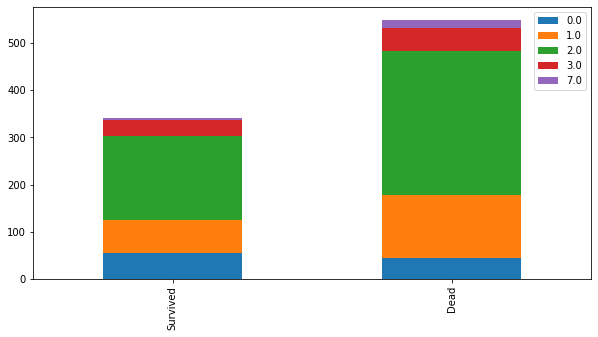

In [40]:
bar_chart('Age_category')

- [x] Fill missing with median
- [x] Use age category

### 3.5 Familysize (SibSp, Parch)

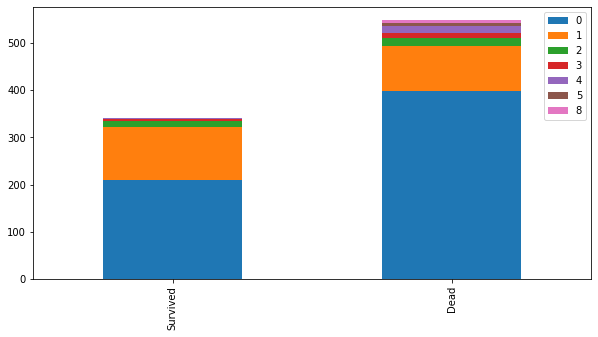

In [41]:
bar_chart('SibSp')

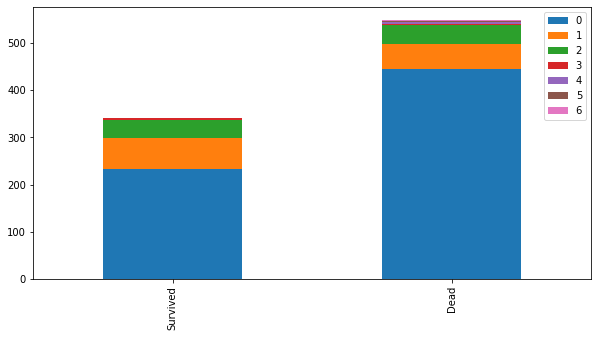

In [42]:
bar_chart('Parch')

- Sibsp - # of siblings / spouses aboard the Titanic
- Parch - # of parents / children aboard the Titanic
- [x] Create FamilySize = Sibsp+Parch+1

### 3.6 Ticket

In [43]:
train['Ticket'].value_counts(dropna=False)

CA. 2343             7
347082               7
1601                 7
3101295              6
CA 2144              6
                    ..
2695                 1
STON/O 2. 3101275    1
111428               1
CA. 2314             1
113787               1
Name: Ticket, Length: 681, dtype: int64

- [x] Drop Ticket

### 3.7 Fare

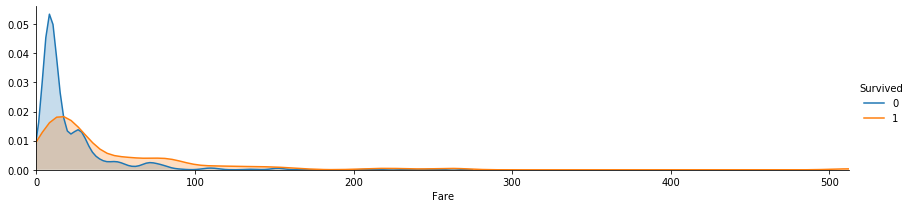

In [44]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [45]:
train['Fare'].mean()

32.2042079685746

In [46]:
train['Fare'].median()

14.4542

- [x] fill missing Fare with median

### 3.8 Cabin

In [47]:
train['Cabin'].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
C91              1
C62 C64          1
C111             1
A32              1
B50              1
Name: Cabin, Length: 148, dtype: int64

- [x] drop Cabin

### 3.9 Embarked

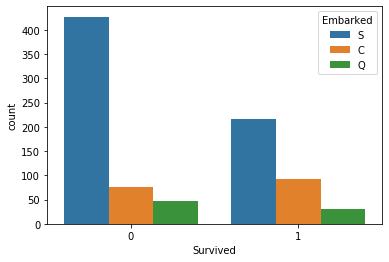

In [48]:
sns.countplot(x="Survived",hue="Embarked",data=train)

- [x] Fill missing Emarked with S

## 4. Feature engineering

- [x] PassengerId - drop
- [x] ***Survived = categorie***
- [x] **Pclass**
- [x] Name - drop name, keep title (grouped)
- [x] **Sex** - use, make numeric
- [x] **Age** - use, fill missing
- [x] SibSp, Parch - make new feature **FamilySize**
- [x] Ticket - drop
- [x] **Fare** - use, fill missing
- [x] Cabin - drop
- [x] **Embarked** - use, fill missing and make numeric

In [49]:
# drop passenger ID (keep in test tot make submission file)
train.drop(labels = ["PassengerId"], axis = 1, inplace = True)

# PClass is already fine

# drop Name
train.drop(labels = ["Name"], axis = 1, inplace = True)
test.drop(labels = ["Name"], axis = 1, inplace = True)

# make Sex numeric
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

# fill missing Ages - > 3.4 ages

# make feature familysize
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

#Drop Cabin, Ticket, Parch, SibSp, Ages
train.drop(labels = ["Cabin", "Ticket", "Parch", "SibSp", "Age"], axis = 1, inplace = True)
test.drop(labels = ["Cabin", "Ticket", "Parch", "SibSp", "Age"], axis = 1, inplace = True)

#Is Fare 0,- really free or missing?
test["Fare"].fillna(test["Fare"].median(), inplace = True)

#Fill Embarked empty with Southampton and make numeric
train["Embarked"].fillna("S", inplace = True)

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

In [50]:
null_table(train, test)

Training Data Frame
Survived        0
Pclass          0
Sex             0
Fare            0
Embarked        0
Title           0
Age_category    0
FamilySize      0
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Sex             0
Fare            0
Embarked        0
Title           0
Age_category    0
FamilySize      0
dtype: int64


In [51]:
train.shape

(891, 8)

In [52]:
train.shape

(891, 8)

In [53]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_category,FamilySize
0,0,3,0,7.2500,0,0,1.0,2
1,1,1,1,71.2833,1,2,2.0,2
2,1,3,1,7.9250,0,1,2.0,1
3,1,1,1,53.1000,0,2,2.0,2
4,0,3,0,8.0500,0,0,2.0,1


In [54]:
#defining features
features = ["Pclass", "Sex", "Age_category", "Embarked", "Fare", "FamilySize", "Title"] ## nog aanvullen
X_train = train[features] #define training features
y_train = train["Survived"] #define training label set
X_test = test[features] #define testing feature
#There is no y_test, that is what we are predicting

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Fare            891 non-null float64
Embarked        891 non-null int64
Title           891 non-null int64
Age_category    891 non-null float64
FamilySize      891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## 5. Create, train and tune model

## 5.1 Train on trainingdata

In [56]:
# Support Vector Machines (SVM, uses decision boundary)
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train), 4)
acc_svc

0.8777

In [57]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train), 4)
acc_knn

0.8058

In [58]:
# Random Forest (multiple small decision trees)
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train), 4)
acc_random_forest

0.9439

In [59]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train), 4)
acc_decision_tree

0.9439

In [60]:
# Gaussian Naive Bayes (probability all features)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train), 4)
acc_gaussian

0.8092

## 5.2 Train with KFold

In [61]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [62]:
# SVM - k-fold
clf = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
acc_kfold_svc = round(np.mean(score), 6)
acc_kfold_svc

[0.88888889 0.96629213 0.95505618 0.95505618 0.94382022 0.97752809
 0.96629213 0.94382022 0.88764045 0.98876404]


0.947316

In [63]:
#KNN - k-fold
clf = KNeighborsClassifier(n_neighbors = 4)
scoring = 'accuracy'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
acc_kfold_knn = round(np.mean(score), 6)
acc_kfold_knn

[0.78888889 0.92134831 0.8988764  0.86516854 0.92134831 0.94382022
 0.88764045 0.8988764  0.83146067 0.85393258]


0.881136

In [64]:
# Decision Tree - k-fold
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
acc_kfold_decision_tree = round(np.mean(score), 6)
acc_kfold_decision_tree

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [65]:
#Random Forest - k-fold
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
acc_kfold_random_forest = round(np.mean(score), 6)
acc_kfold_random_forest

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [66]:
#Gaussian Naive Bayes - k-fold
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
acc_kfold_gaussian = round(np.mean(score), 6)
acc_kfold_gaussian

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

## 5.3 Recall

In [67]:
# SVM - k-fold
clf = SVC(gamma='auto')
scoring = 'recall'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
recall_kfold_svc = round(np.mean(score), 6)
recall_kfold_svc

[0.84615385 0.93333333 0.90322581 1.         0.96296296 0.96774194
 0.97222222 0.93548387 0.87179487 1.        ]


0.939292

In [68]:
#KNN - k-fold
clf = KNeighborsClassifier(n_neighbors = 4)
scoring = 'recall'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
recall_kfold_knn = round(np.mean(score), 6)
recall_kfold_knn

[0.66666667 0.8        0.70967742 0.75       0.92592593 0.90322581
 0.80555556 0.83870968 0.76923077 0.76190476]


0.79309

In [69]:
# Decision Tree - k-fold
clf = DecisionTreeClassifier()
scoring = 'recall'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
recall_kfold_decision_tree = round(np.mean(score), 6)
recall_kfold_decision_tree

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [70]:
#Random Forest - k-fold
clf = RandomForestClassifier(n_estimators=13)
scoring = 'recall'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
recall_kfold_random_forest = round(np.mean(score), 6)
recall_kfold_random_forest

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [71]:
#Gaussian Naive Bayes - k-fold
clf = GaussianNB()
scoring = 'recall'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
recall_kfold_gaussian = round(np.mean(score), 6)
recall_kfold_gaussian

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

## 5.4 Precision

In [72]:
# SVM - k-fold
clf = SVC(gamma='auto')
scoring = 'precision'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
precision_kfold_svc = round(np.mean(score), 6)
precision_kfold_svc

[0.89189189 0.96551724 0.96551724 0.9        0.86666667 0.96774194
 0.94594595 0.90625    0.87179487 0.97674419]


0.925807

In [73]:
#KNN - k-fold
clf = KNeighborsClassifier(n_neighbors = 4)
scoring = 'precision'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
precision_kfold_knn = round(np.mean(score), 6)
precision_kfold_knn

[0.8125     0.96       1.         0.9        0.83333333 0.93333333
 0.90625    0.86666667 0.83333333 0.91428571]


0.89597

In [74]:
# Decision Tree - k-fold
clf = DecisionTreeClassifier()
scoring = 'precision'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
precision_kfold_decision_tree = round(np.mean(score), 6)
precision_kfold_decision_tree

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [75]:
#Random Forest - k-fold
clf = RandomForestClassifier(n_estimators=13)
scoring = 'precision'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
precision_kfold_random_forest = round(np.mean(score), 6)
precision_kfold_random_forest

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [76]:
#Gaussian Naive Bayes - k-fold
clf = GaussianNB()
scoring = 'precision'
score = cross_val_score(clf, train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
precision_kfold_gaussian = round(np.mean(score), 6)
precision_kfold_gaussian

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

## 5.5 Results

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 
              'Random Forest', 'Decision Tree', 'Naive Bayes'],
    'Acc': [acc_svc, acc_knn, acc_random_forest, acc_decision_tree, acc_gaussian],
 'Acc_kfold' : [acc_kfold_svc, acc_kfold_knn, acc_kfold_random_forest, acc_kfold_decision_tree, acc_kfold_gaussian],
 'recall' : [recall_kfold_svc, recall_kfold_knn, recall_kfold_random_forest, recall_kfold_decision_tree, recall_kfold_gaussian],
 'precision' : [precision_kfold_svc, precision_kfold_knn, precision_kfold_random_forest, precision_kfold_decision_tree, precision_kfold_gaussian]
})
models.sort_values(by='Acc', ascending=False) 

,Model,Acc,Acc_kfold,recall,precision
2,Random Forest,0.9439,1.000000,1.000000,1.000000
3,Decision Tree,0.9439,1.000000,1.000000,1.000000
0,Support Vector Machine,0.8777,0.947316,0.939292,0.925807
4,Naive Bayes,0.8092,1.000000,1.000000,1.000000
1,KNN,0.8058,0.881136,0.793090,0.895970


## 6. Apply to test-data

In [78]:
# Random Forest (multiple small decision trees)
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train), 4)
acc_random_forest

0.9439

In [79]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [80]:
submission.to_csv('../02_titanic_submission.csv', index=False)

In [81]:
submission['Survived'].value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

In [82]:
#submitted to Kaggle, score 0,76794